In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV
caminho_arquivos = {
    "product": "/content/product.csv",
    "rideaddress_v1": "/content/rideaddress_v1.csv",
    "rideestimative_v3": "/content/rideestimative_v3.csv",
    "ride_v2": "/content/ride_v2.csv"
}

dataframes = {}  # Dicionário de dataframes

for nome, path in caminho_arquivos.items():
    dataframes[nome] = pd.read_csv(path, delimiter=";")

print("")
print("TD OK")


TD OK


In [ ]:
# Seleciona os dados: filtra a qnt de passageiros por corrida

if "ride_v2" in dataframes and "TotalUsers" in dataframes["ride_v2"].columns:
    dataframes["ride_v2"] = dataframes["ride_v2"][dataframes["ride_v2"]["TotalUsers"] >= 1]

In [ ]:
# Limpa e uniformiza dados
for nome, df in dataframes.items():
    df = df.drop_duplicates()
    for coluna in df.columns:
        if df[coluna].dtype in ["float64", "int64"]:
            df[coluna] = df[coluna].fillna(df[coluna].mean())
        else:
            df[coluna] = df[coluna].fillna("Nao Informado")
    dataframes[nome] = df

# dps remove colunas de price
colunas_preco = [col for df in dataframes.values() for col in df.columns if "price" in col.lower()]
colunas_preco = list(set(colunas_preco))  # eliminar duplicatas globais

for nome in dataframes:
    df = dataframes[nome]
    df = df.drop(columns=[col for col in df.columns if col in colunas_preco], errors='ignore')
    dataframes[nome] = df

In [ ]:
# Deriva dados
rideaddress = dataframes["rideaddress_v1"]

# dps junta rua e numero numa nova coluna
rideaddress["Localizacao"] = rideaddress["Street"].astype(str) + ", " + rideaddress["Number"].astype(str)

dataframes["rideaddress_v1"] = rideaddress

In [ ]:
# Integra os dados
product = dataframes["product"]
rideestimative = dataframes["rideestimative_v3"]
rideestimative = pd.merge(rideestimative, product, on="ProductID", how="left")
dataframes["rideestimative_v3"] = rideestimative

<ipython-input-11-b0289dd87205>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


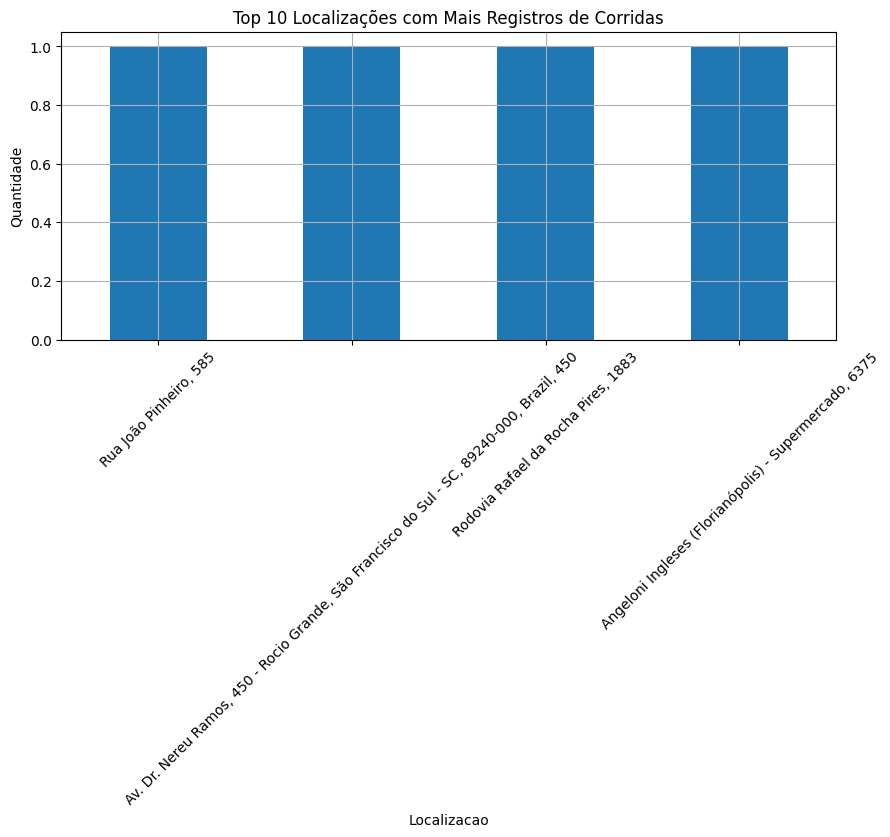

In [ ]:
# Formata os dados
for nome in dataframes:
    df = dataframes[nome]
    df.columns = [col.lower() for col in df.columns]
    dataframes[nome] = df

plt.figure(figsize=(10, 4))
dataframes["rideaddress_v1"]["localizacao"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Localizações com Mais Registros de Corridas")
plt.xlabel("Localizacao")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()